# IMPORT DATA

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [144]:
event_df = pd.read_csv("eco_event.csv")
place_df = pd.read_csv("eco_place.csv")
rating_df = pd.read_csv("eco_rating.csv")

-- This is for scraping hehe --

In [145]:
place_df[["place_name", "place_map"]].iloc[1].tolist()

['Desa Wisata Munduk', 'https://goo.gl/maps/LyeJ2mAeFGysTE9v9']

In [146]:
places = []
i = 0
for i in range(len(place_df)):
    places.append(tuple(place_df[["place_name", "place_map"]].iloc[i].tolist()))
print(places)

[('Taman Nasional Gunung Leuser', 'https://www.google.com/maps/search/Taman+Nasional+Gunung+Leuser'), ('Desa Wisata Munduk', 'https://goo.gl/maps/LyeJ2mAeFGysTE9v9'), ('Desa Wisata Penglipuran', 'https://www.google.com/maps/search/Desa+Wisata+Penglipuran'), ('Taman Nasional Bali Barat', 'https://www.google.com/maps/search/Taman+Nasional+Bali+Barat'), ('Bukit Jamur', 'https://www.google.com/maps/search/Bukit+Jamur'), ('Bukit Moko', 'https://www.google.com/maps/search/Bukit+Moko'), ('Curug Bugbrug', 'https://www.google.com/maps/search/Curug+Bugbrug'), ('Curug Cilengkrang', 'https://www.google.com/maps/search/Curug+Cilengkrang'), ('Curug Cimahi', 'https://www.google.com/maps/search/Curug+Cimahi'), ('Curug Cipanas', 'https://www.google.com/maps/search/Curug+Cipanas'), ('Curug Luhur Waterfall', 'https://www.google.com/maps/search/Curug+Luhur+Waterfall'), ('Curug Malela', 'https://www.google.com/maps/search/Curug+Malela'), ('Curug Tilu Leuwi Opat', 'https://www.google.com/maps/search/Curug+T

In [147]:
google_reviews = pd.read_csv("google_maps_reviews.csv")
google_reviews["google_review_count"].isnull().sum()

2

-- End of scraping --

In [148]:
event_df

,event_id,event_img,event_name,event_place,event_date,event_about
0,1,https://storage.googleapis.com/travelee-capsto...,FESTIVAL ECOTOURISM 2022 - Membangun Investasi...,"Manokwari City Mall (MCM), Papua Barat",29 September - 1 Oktober 2022,Ayo bergabung dalam FESTIVAL ECOTOURISM 2022 R...
1,2,https://storage.googleapis.com/travelee-capsto...,Festival Taman nasional Taman Wisata Alam Indo...,"Lapangan Aldiron, Jl. Gatot Subroto, Jakarta",5 - 7 Agustus 2022,Sambut Festival FTNTWA dan Festival Ekowisata ...
2,3,https://storage.googleapis.com/travelee-capsto...,Medan - Belawan Mangrove Forest Festival,"Mako Lantamal-I, Medan, Sumatra Utara",19 Agustus 2018,Sambut keindahan hutan mangrove di Medan - Bel...
3,4,https://storage.googleapis.com/travelee-capsto...,FESTIVAL MANGROVE 2022,"Kuala Langsa, Aceh",10 Desember 2022,Selamat datang di Festival Mangrove 2022. Raya...
4,5,https://storage.googleapis.com/travelee-capsto...,INDOFEST INDONESIA OUTDOOR FESTIVAL 2023,"Istora Senayan, Jakarta Selatan",1 - 4 Juni 2023,Selamat datang di Indofest Indonesia Outdoor F...
5,6,https://storage.googleapis.com/travelee-capsto...,Indonesia Ecotourism Summit 2023 Ecotourism Fo...,"InterContinental Hotel, Bandung",23 Mei 2023,Selamat datang di Indonesia Ecotourism Summit ...


In [149]:
rating_df

,user_id,place_id,user_rating
0,1,28,2
1,1,86,4
2,1,94,4
3,1,146,3
4,2,17,2
...,...,...,...
844,156,144,4
845,156,15,5
846,156,29,4
847,156,52,4


In [150]:
place_df

,place_id,place_name,place_description,category,city,price,rating,description_location,place_img,gallery_photo_img1,gallery_photo_img2,gallery_photo_img3,place_map
0,1,Taman Nasional Gunung Leuser,Taman Nasional Gunung Leuser adalah salah satu...,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,"Barisan mountain range, Aceh 24653",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
1,2,Desa Wisata Munduk,Desa Wisata Munduk adalah sebuah desa di pegun...,Desa Wisata,Bali,"Rp10,000",4.5,"Munduk, Banjar, Kabupaten Buleleng, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://goo.gl/maps/LyeJ2mAeFGysTE9v9
2,3,Desa Wisata Penglipuran,Desa Wisata Penglipuran adalah sebuah desa wis...,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,"Jl. Penglipuran, Kubu, Kec. Bangli, Kabupaten ...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Desa+Wisata...
3,4,Taman Nasional Bali Barat,Taman Nasional Bali Barat adalah kawasan konse...,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,"Sumber Klampok, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
4,5,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,"Rp12,000",4.2,"Sugihmukti, Kec. Pasirjambu, Kabupaten Bandung...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Bukit+Jamur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,Studio Alam Gamplong,Studio Gamplong atau Studio Alam Gamplong adal...,Taman Hiburan,Yogyakarta,"Rp10,000",4.4,"Gamplong 1, Dukuh, Sumberrahayu, Kec. Moyudan,...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Studio+Alam...
178,179,Watu Goyang,Watu Goyang adalah sebuah fenomena geologis ya...,"Budaya,Cagar Alam",Yogyakarta,"Rp2,500",4.4,"Cempluk, Jl. Watu Goyang No.1, Griloyo, Mangun...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Watu+Goyang
179,180,Watu Lumbung,Letak Kampung Edukasi Watu Lumbung yang berada...,Cagar Alam,Yogyakarta,"Rp5,000",4.3,"Area Hutan, Balong, Kec. Girisubo, Kabupaten G...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Watu+Lumbung
180,181,Wisata Alam Kalibiru,Kalibiru sebenarnya adalah sebuah nama hutan y...,"Budaya,Cagar Alam",Yogyakarta,"Rp20,000",4.4,"Jalan Waduk Sermo, Kalibiru, Hargowilis, Kec. ...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Wisata+Alam...


# DATA PREP

Memeriksa nilai null dan row duplikat pada dataset.

In [151]:
print("event_df")
print(event_df.isnull().sum())
print()

print("place_df")
print(place_df.isnull().sum())
print()

print("rating_df")
print(rating_df.isnull().sum())
print()

print("google_reviews")
print(google_reviews.isnull().sum())
print()

event_df
event_id       0
event_img      0
event_name     0
event_place    0
event_date     0
event_about    0
dtype: int64

place_df
place_id                 0
place_name               0
place_description        0
category                 0
city                     0
price                    0
rating                   0
description_location     0
place_img                0
gallery_photo_img1       0
gallery_photo_img2       2
gallery_photo_img3      77
place_map                0
dtype: int64

rating_df
user_id        0
place_id       0
user_rating    0
dtype: int64

google_reviews
place_name             0
place_map              0
google_review_count    2
dtype: int64



In [152]:
print(event_df.duplicated().sum())
print(place_df.duplicated().sum())
print(rating_df.duplicated().sum())

0
0
3


Selanjutnya kita akan melakukan pra pemrosesan pada place_df dan rating_df, event_df tidak akan di proses lebih lanjut karena tidak akan digunakan kedepannya.

In [153]:
# Feature engineering
# Membuat fitur jumlah visit dan jumlah revisit

rating_place_df = rating_df.merge(place_df, on="place_id", how="left")
rating_place_df

,user_id,place_id,user_rating,place_name,place_description,category,city,price,rating,description_location,place_img,gallery_photo_img1,gallery_photo_img2,gallery_photo_img3,place_map
0,1,28,2,Saung Angklung Mang Udjo,Saung Angklung Mang Udjo adalah tempat wisata ...,Budaya,Bandung,"Rp75,000",4.7,"Jl. Padasuka No.118, Pasirlayung, Kec. Cibeuny...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Saung+Angkl...
1,1,86,4,Desa Wisata Ngadas,Desa ini terkenal karena keindahan alamnya yan...,"Cagar Alam,Desa Wisata",Malang,Gratis,4.5,"Ngadas, poncokusumo, Kabupaten Malang, Jawa Timur",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Desa+Wisata...
2,1,94,4,Taman Wisata Alam Punti Kayu,Taman Wisata Alam Punti Kayu terletak di Kota ...,"Budaya,Cagar Alam",Palembang,"Rp10,000",4.3,"Jalan Kol. Burlian Km. 6,5, Karya Baru, Alang ...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Taman+Wisat...
3,1,146,3,Hutan Pinus Pengger,Hutan Pinus Pengger mudah dijangkau karena ter...,"Cagar Alam,Taman Hiburan",Yogyakarta,"Rp3,000",4.5,"Jl. Dlingo-Patuk, Sendangsari, Terong, Kec. Dl...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Hutan+Pinus...
4,2,17,2,Gunung Lalakon,Gunung Lalakon adalah gunung yang terletak di ...,"Cagar Alam,Taman Nasional",Bandung,Gratis,4.8,"Situwangi, Cihampelas, West Bandung Regency, W...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Gunung+Lalakon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,156,144,4,Goa Rancang Kencono,Goa Rancang Kencono yang terletak di Padukuhan...,"Budaya,Cagar Alam",Yogyakarta,"Rp5,000",4.3,"Mungguran II, Bleberan, Playen, Gunung Kidul R...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Goa+Rancang...
845,156,15,5,Dusun Bambu,Dusun Bambu adalah destinasi wisata keluarga y...,Taman Hiburan,Bandung,"Rp20,000",4.5,"Jl. Kolonel Masturi No.KM. 11, Kertawangi, Kec...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Dusun+Bambu
846,156,29,4,Selasar Sunaryo Art Space,Selasar Sunaryo Art Space (SSAS) adalah galeri...,"Budaya,Taman Hiburan",Bandung,"Rp25,000",4.6,"Jl. Bukit Pakar Timur No.100, Ciburial, Kec. C...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Selasar+Sun...
847,156,52,4,Taman Hutan Raya Ngurah Rai,Taman Hutan Raya Ngurah Rai terletak di Bali d...,"Cagar Alam,Taman Nasional",Denpasar,"Rp10,000",4.2,"Jl. Bypass Ngurah Rai No.88X, Pemogan, Denpasa...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Hutan...


In [154]:
jumlah_visit = rating_place_df.groupby("place_id")["user_id"].nunique().reset_index()
jumlah_visit.columns = ["place_id", "jumlah_review_travelee"]
jumlah_visit

,place_id,jumlah_review_travelee
0,2,5
1,3,5
2,4,1
3,5,5
4,6,1
...,...,...
177,179,7
178,180,2
179,181,4
180,182,6


In [155]:
jumlah_revisit = rating_place_df.groupby(["place_id", "user_id"]).size().reset_index(name = "count")
jumlah_revisit = jumlah_revisit[jumlah_revisit["count"] > 1].groupby("place_id").size().reset_index(name = "jumlah_revisit")
jumlah_revisit

,place_id,jumlah_revisit
0,15,1
1,18,1
2,76,1
3,81,1
4,92,1
5,105,1
6,111,1
7,144,1
8,145,1
9,173,1


In [156]:
travelee_rating = rating_df.groupby("place_id")["user_rating"].mean().reset_index()
travelee_rating.columns = ["place_id", "travelee_rating"]

In [157]:
place_df = place_df.merge(travelee_rating, on="place_id", how="left")

In [158]:
place_df["travelee_rating"] = place_df["travelee_rating"].fillna(0)

In [159]:
# menambahkan kolom jumlah google review
place_df = place_df.merge(google_reviews, on="place_name", how="left")

In [160]:
# memeriksa kolom yang null
place_df.isnull().sum()

place_id                 0
place_name               0
place_description        0
category                 0
city                     0
price                    0
rating                   0
description_location     0
place_img                0
gallery_photo_img1       0
gallery_photo_img2       2
gallery_photo_img3      77
place_map_x              0
travelee_rating          0
place_map_y              0
google_review_count      2
dtype: int64

In [161]:
# karena hanya 2 baris yang google reviewnya null, maka kita drop saja

place_df = place_df.dropna(subset=["google_review_count"])
place_df


,place_id,place_name,place_description,category,city,price,rating,description_location,place_img,gallery_photo_img1,gallery_photo_img2,gallery_photo_img3,place_map_x,travelee_rating,place_map_y,google_review_count
0,1,Taman Nasional Gunung Leuser,Taman Nasional Gunung Leuser adalah salah satu...,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,"Barisan mountain range, Aceh 24653",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...,0.000000,https://www.google.com/maps/search/Taman+Nasio...,234.0
1,2,Desa Wisata Munduk,Desa Wisata Munduk adalah sebuah desa di pegun...,Desa Wisata,Bali,"Rp10,000",4.5,"Munduk, Banjar, Kabupaten Buleleng, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://goo.gl/maps/LyeJ2mAeFGysTE9v9,3.800000,https://goo.gl/maps/LyeJ2mAeFGysTE9v9,834.0
2,3,Desa Wisata Penglipuran,Desa Wisata Penglipuran adalah sebuah desa wis...,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,"Jl. Penglipuran, Kubu, Kec. Bangli, Kabupaten ...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Desa+Wisata...,3.000000,https://www.google.com/maps/search/Desa+Wisata...,22836.0
3,4,Taman Nasional Bali Barat,Taman Nasional Bali Barat adalah kawasan konse...,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,"Sumber Klampok, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...,3.000000,https://www.google.com/maps/search/Taman+Nasio...,3194.0
4,5,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,"Rp12,000",4.2,"Sugihmukti, Kec. Pasirjambu, Kabupaten Bandung...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Bukit+Jamur,3.600000,https://www.google.com/maps/search/Bukit+Jamur,1776.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,Studio Alam Gamplong,Studio Gamplong atau Studio Alam Gamplong adal...,Taman Hiburan,Yogyakarta,"Rp10,000",4.4,"Gamplong 1, Dukuh, Sumberrahayu, Kec. Moyudan,...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,NaN,https://www.google.com/maps/search/Studio+Alam...,3.333333,https://www.google.com/maps/search/Studio+Alam...,13387.0
178,179,Watu Goyang,Watu Goyang adalah sebuah fenomena geologis ya...,"Budaya,Cagar Alam",Yogyakarta,"Rp2,500",4.4,"Cempluk, Jl. Watu Goyang No.1, Griloyo, Mangun...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Watu+Goyang,3.571429,https://www.google.com/maps/search/Watu+Goyang,1577.0
179,180,Watu Lumbung,Letak Kampung Edukasi Watu Lumbung yang berada...,Cagar Alam,Yogyakarta,"Rp5,000",4.3,"Area Hutan, Balong, Kec. Girisubo, Kabupaten G...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Watu+Lumbung,3.000000,https://www.google.com/maps/search/Watu+Lumbung,

In [162]:
place_df.isnull().sum()

place_id                 0
place_name               0
place_description        0
category                 0
city                     0
price                    0
rating                   0
description_location     0
place_img                0
gallery_photo_img1       0
gallery_photo_img2       1
gallery_photo_img3      75
place_map_x              0
travelee_rating          0
place_map_y              0
google_review_count      0
dtype: int64

In [163]:
# drop kolom yang tidak relevan terhadap pemodelan
kolom_relevan = ["place_id", "category", "city", "price", "rating", "google_review_count", "travelee_rating"]
place_df = place_df[kolom_relevan]
place_df

,place_id,category,city,price,rating,google_review_count,travelee_rating
0,1,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,234.0,0.000000
1,2,Desa Wisata,Bali,"Rp10,000",4.5,834.0,3.800000
2,3,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,22836.0,3.000000
3,4,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,3194.0,3.000000
4,5,Cagar Alam,Bandung,"Rp12,000",4.2,1776.0,3.600000
...,...,...,...,...,...,...,...
177,178,Taman Hiburan,Yogyakarta,"Rp10,000",4.4,13387.0,3.333333
178,179,"Budaya,Cagar Alam",Yogyakarta,"Rp2,500",4.4,1577.0,3.571429
179,180,Cagar Alam,Yogyakarta,"Rp5,000",4.3,902.0,3.000000
180,181,"Budaya,Cagar Alam",Yogyakarta,"Rp20,000",4.4,7524.0,2.750000


In [164]:
train_df = place_df.merge(jumlah_visit, on="place_id", how="left")
train_df

,place_id,category,city,price,rating,google_review_count,travelee_rating,jumlah_review_travelee
0,1,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,234.0,0.000000,NaN
1,2,Desa Wisata,Bali,"Rp10,000",4.5,834.0,3.800000,5.0
2,3,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,22836.0,3.000000,5.0
3,4,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,3194.0,3.000000,1.0
4,5,Cagar Alam,Bandung,"Rp12,000",4.2,1776.0,3.600000,5.0
...,...,...,...,...,...,...,...,...
175,178,Taman Hiburan,Yogyakarta,"Rp10,000",4.4,13387.0,3.333333,9.0
176,179,"Budaya,Cagar Alam",Yogyakarta,"Rp2,500",4.4,1577.0,3.571429,7.0
177,180,Cagar Alam,Yogyakarta,"Rp5,000",4.3,902.0,3.000000,2.0
178,181,"Budaya,Cagar Alam",Yogyakarta,"Rp20,000",4.4,7524.0,2.750000,4.0


In [165]:
# kita tahu bahwa jumlah review NaN artinya tidak ada review di travelee terhadap destinasi tersebut
train_df["jumlah_review_travelee"] = train_df["jumlah_review_travelee"].fillna(0)
train_df

,place_id,category,city,price,rating,google_review_count,travelee_rating,jumlah_review_travelee
0,1,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,234.0,0.000000,0.0
1,2,Desa Wisata,Bali,"Rp10,000",4.5,834.0,3.800000,5.0
2,3,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,22836.0,3.000000,5.0
3,4,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,3194.0,3.000000,1.0
4,5,Cagar Alam,Bandung,"Rp12,000",4.2,1776.0,3.600000,5.0
...,...,...,...,...,...,...,...,...
175,178,Taman Hiburan,Yogyakarta,"Rp10,000",4.4,13387.0,3.333333,9.0
176,179,"Budaya,Cagar Alam",Yogyakarta,"Rp2,500",4.4,1577.0,3.571429,7.0
177,180,Cagar Alam,Yogyakarta,"Rp5,000",4.3,902.0,3.000000,2.0
178,181,"Budaya,Cagar Alam",Yogyakarta,"Rp20,000",4.4,7524.0,2.750000,4.0


In [166]:
# konversi tipe price menjadi integer
train_df["price"] = train_df["price"].str.replace("Rp", "")
train_df["price"] = train_df["price"].str.replace(",", "")
train_df["price"] = train_df["price"].str.replace("Gratis", "0")
train_df["price"].astype(int)
train_df

,place_id,category,city,price,rating,google_review_count,travelee_rating,jumlah_review_travelee
0,1,"Budaya,Taman Nasional",Aceh,25000,4.5,234.0,0.000000,0.0
1,2,Desa Wisata,Bali,10000,4.5,834.0,3.800000,5.0
2,3,"Budaya,Desa Wisata",Bali,25000,4.8,22836.0,3.000000,5.0
3,4,"Taman Nasional,Cagar Alam",Bali,15000,4.5,3194.0,3.000000,1.0
4,5,Cagar Alam,Bandung,12000,4.2,1776.0,3.600000,5.0
...,...,...,...,...,...,...,...,...
175,178,Taman Hiburan,Yogyakarta,10000,4.4,13387.0,3.333333,9.0
176,179,"Budaya,Cagar Alam",Yogyakarta,2500,4.4,1577.0,3.571429,7.0
177,180,Cagar Alam,Yogyakarta,5000,4.3,902.0,3.000000,2.0
178,181,"Budaya,Cagar Alam",Yogyakarta,20000,4.4,7524.0,2.750000,4.0


In [167]:
# karena kolom kategori tidak sepenuhnya atomic, maka akan kita expand menjadi dua kolom kategori

# Split the column (limit to 3)
train_df[['Category1', 'Category2', 'ExtraCategory']] = train_df['category'].str.split(',', n=2, expand=True)  # n=2 means split at most twice

train_df["ExtraCategory"].value_counts()
train_df.drop(columns=["ExtraCategory", "category"], inplace=True)
train_df

,place_id,city,price,rating,google_review_count,travelee_rating,jumlah_review_travelee,Category1,Category2
0,1,Aceh,25000,4.5,234.0,0.000000,0.0,Budaya,Taman Nasional
1,2,Bali,10000,4.5,834.0,3.800000,5.0,Desa Wisata,None
2,3,Bali,25000,4.8,22836.0,3.000000,5.0,Budaya,Desa Wisata
3,4,Bali,15000,4.5,3194.0,3.000000,1.0,Taman Nasional,Cagar Alam
4,5,Bandung,12000,4.2,1776.0,3.600000,5.0,Cagar Alam,None
...,...,...,...,...,...,...,...,...,...
175,178,Yogyakarta,10000,4.4,13387.0,3.333333,9.0,Taman Hiburan,None
176,179,Yogyakarta,2500,4.4,1577.0,3.571429,7.0,Budaya,Cagar Alam
177,180,Yogyakarta,5000,4.3,902.0,3.000000,2.0,Cagar Alam,None
178,181,Yogyakarta,20000,4.4,7524.0,2.750000,4.0,Budaya,Cagar Alam


In [168]:
train_df.dtypes

place_id                    int64
city                       object
price                      object
rating                    float64
google_review_count       float64
travelee_rating           float64
jumlah_review_travelee    float64
Category1                  object
Category2                  object
dtype: object

In [169]:
train_df["price"] = train_df["price"].astype(int)

In [170]:
encoded_train = pd.get_dummies(train_df.select_dtypes(include=["object"]))
final_train = train_df.drop(columns=["city", "Category1", "Category2", "place_id"])
final_train = pd.concat([final_train, encoded_train], axis=1)
final_train

,price,rating,google_review_count,travelee_rating,jumlah_review_travelee,city_Aceh,city_Bali,city_Bandung,city_Banten,city_Bantul,...,Category1_Bahari,Category1_Budaya,Category1_Cagar Alam,Category1_Desa Wisata,Category1_Taman Hiburan,Category1_Taman Nasional,Category2_Cagar Alam,Category2_Desa Wisata,Category2_Taman Hiburan,Category2_Taman Nasional
0,25000,4.5,234.0,0.000000,0.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,10000,4.5,834.0,3.800000,5.0,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,25000,4.8,22836.0,3.000000,5.0,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,15000,4.5,3194.0,3.000000,1.0,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,12000,4.2,1776.0,3.600000,5.0,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,10000,4.4,13387.0,3.333333,9.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
176,2500,4.4,1577.0,3.571429,7.0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
177,5000,4.3,902.0,3.000000,2.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
178,20000,4.4,7524.0,2.750000,4.0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


# MODEL TRAINING

In [171]:
# Split Data 

from sklearn.model_selection import train_test_split

final_features = final_train.drop(columns="rating").columns.tolist()
target = "rating"

X = final_train[final_features]
y = final_train[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

### R2

In [172]:
def objective_r2(trial):

    n_estimators = trial.suggest_int("n_estimators", 70, 82)
    max_depth = trial.suggest_int("max_depth", 23, 33)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 2)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 1)

    model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)
    r2 = r2_score(y_train, y_pred)

    return r2

### MAE

In [173]:
def objective_mae(trial):

    n_estimators = trial.suggest_int("n_estimators", 55, 65)
    max_depth = trial.suggest_int("max_depth", 20, 25)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 2)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 1)

    model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)

    return mae

In [174]:
# MAE
# study = optuna.create_study(direction="minimize")
# study.optimize(objective_mae, n_trials=20, show_progress_bar=True)
# best_params_mae = study.best_params
# best_params_mae

In [175]:
# MAE
print("Best trial MAE:", study.best_trial)
print("Best hyperparameters MAE:", study.best_params)

Best trial MAE: FrozenTrial(number=3, state=1, values=[0.8783795187137053], datetime_start=datetime.datetime(2024, 6, 20, 18, 12, 9, 876309), datetime_complete=datetime.datetime(2024, 6, 20, 18, 12, 10, 64012), params={'n_estimators': 76, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=82, log=False, low=70, step=1), 'max_depth': IntDistribution(high=33, log=False, low=23, step=1), 'min_samples_split': IntDistribution(high=2, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=1, log=False, low=1, step=1)}, trial_id=3, value=None)
Best hyperparameters MAE: {'n_estimators': 76, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [176]:
# R2
# study = optuna.create_study(direction="maximize")
# study.optimize(objective_r2, n_trials=20, show_progress_bar=True)
# best_params_r2 = study.best_params
# best_params_r2

In [177]:
# R2
print("Best trial R2:", study.best_trial)
print("Best hyperparameters R2:", study.best_params)

Best trial R2: FrozenTrial(number=3, state=1, values=[0.8783795187137053], datetime_start=datetime.datetime(2024, 6, 20, 18, 12, 9, 876309), datetime_complete=datetime.datetime(2024, 6, 20, 18, 12, 10, 64012), params={'n_estimators': 76, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=82, log=False, low=70, step=1), 'max_depth': IntDistribution(high=33, log=False, low=23, step=1), 'min_samples_split': IntDistribution(high=2, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=1, log=False, low=1, step=1)}, trial_id=3, value=None)
Best hyperparameters R2: {'n_estimators': 76, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}


## Optuna Evaluation

In [198]:
best_params_mae = {'n_estimators': 62, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1, 'random_state': 42} 
# values=[0.0598020833333337]
best_params_r2 = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1} 
# values=[0.8782734101912537]

## Create New Model

### Random Forest Regressor MAE

In [200]:
best_params_mae['random_state'] = 42
random_forest_mae = RandomForestRegressor(**best_params_mae)
random_forest_mae.fit(X_train, y_train)

y_pred = random_forest_mae.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)

print(f"mae: {mae}")

y_pred = random_forest_mae.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)

print(f"mae: {mae}")

mae: 0.06015905017921175
mae: 0.14870071684587796


In [180]:
cv_scores = cross_val_score(random_forest_mae, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-validation scores:", cv_scores)
print("Average score (Random Forest; Mae):", cv_scores.mean())

Cross-validation scores: [-0.15789766 -0.21284761 -0.17113459 -0.1769188  -0.16273041]
Average score (Random Forest; Mae): -0.17630581598601608


### Random Forest Regressor R2

In [181]:
r2_new_model = RandomForestRegressor(**best_params_r2)
r2_new_model.fit(X_train, y_train)

y_pred = r2_new_model.predict(X_train)
r2 = r2_score(y_train, y_pred)

print(f"R2: {r2}")

R2: 0.884728917534927


In [182]:
cv_scores = cross_val_score(random_forest_mae, X_train, y_train, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score (Random Forest; Mae):", cv_scores.mean())

Cross-validation scores: [ 0.00328325 -0.17643377 -0.16638777 -0.04021759 -0.23977165]
Average score (Random Forest; Mae): -0.1239055086164936


### KNN

In [183]:
from sklearn import neighbors

rmse_val = [] 
for K in range(1,20):
    # print(f"K = {K}")
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train) 
    y_predtrain_knn = knn.predict(X_train) 
    mae_train = mean_absolute_error(y_train, y_predtrain_knn)
    y_predval_knn = knn.predict(X_val) 
    mae_val = mean_absolute_error(y_val, y_predval_knn)
    print(f"K = {K} \n mae_train = {mae_train}, mae_val = {mae_val}, mae_diff = {mae_train-mae_val}") #semakin positif semakin bagus

K = 2 
 mae_train = 0.1138888888888889, mae_val = 0.2013888888888889, mae_diff = -0.0875
K = 3 
 mae_train = 0.12453703703703711, mae_val = 0.18518518518518517, mae_diff = -0.06064814814814806
K = 4 
 mae_train = 0.13697916666666668, mae_val = 0.16805555555555557, mae_diff = -0.03107638888888889
K = 5 
 mae_train = 0.14111111111111108, mae_val = 0.17777777777777778, mae_diff = -0.03666666666666671
K = 6 
 mae_train = 0.14988425925925927, mae_val = 0.18055555555555558, mae_diff = -0.030671296296296308
K = 7 
 mae_train = 0.15228174603174605, mae_val = 0.17420634920634914, mae_diff = -0.021924603174603097
K = 8 
 mae_train = 0.15460069444444446, mae_val = 0.17118055555555542, mae_diff = -0.016579861111110955
K = 9 
 mae_train = 0.1571759259259259, mae_val = 0.17253086419753072, mae_diff = -0.015354938271604807
K = 10 
 mae_train = 0.1609722222222222, mae_val = 0.17527777777777773, mae_diff = -0.014305555555555516
K = 11 
 mae_train = 0.16167929292929295, mae_val = 0.1714646464646464, mae

In [184]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 11)

knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_train) 
mae_train = mean_absolute_error(y_train, y_pred_knn)
mae_train

0.16167929292929295

### Neural Network

In [212]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import optuna

import random
import tensorflow as tf

In [186]:
# from numpy import loadtxt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import mean_absolute_error
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# import optuna

# # Normalize input features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_val)

# def objective_neural_network(trial):

#     layer_1 = trial.suggest_int("layer_1", 2, 8)
#     layer_2 = trial.suggest_int("layer_2", 2, 8)
#     layer_3 = trial.suggest_int("layer_3", 2, 8)
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
#     epoch = trial.suggest_int("epoch", 10, 50)
#     batch_size = trial.suggest_int("batch_size", 1, 100)
#     optimizer_name = trial.suggest_categorical("optimizer", ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'])

#     optimizer_map = {
#         'Adadelta': Adadelta(learning_rate=learning_rate),
#         'Adagrad': Adagrad(learning_rate=learning_rate),
#         'Adam': Adam(learning_rate=learning_rate),
#         'RMSprop': RMSprop(learning_rate=learning_rate),
#         'SGD': SGD(learning_rate=learning_rate)
#     }

#     optimizer = optimizer_map[optimizer_name]

#     neural_network = Sequential()
#     neural_network.add(Dense(layer_1, input_shape=(60,), activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(layer_2, activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(layer_3, activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(1, activation='relu'))

#     neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#     neural_network.fit(X_train_scaled, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

#     y_pred = neural_network.predict(X_train_scaled)
#     mae = mean_absolute_error(y_train, y_pred)
    
#     return mae

# study = optuna.create_study(direction='minimize')
# study.optimize(objective_neural_network, n_trials=100)

# print("Best value (MAE):", study.best_value)
# print("Best parameters:", study.best_params)


#### MLP

In [213]:
# Set random seeds for reproducibility
from sklearn.neural_network import MLPRegressor


random_state = 38
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build MLP
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)

# Fit neural network
mlp.fit(X_train_scaled, y_train)

# Predict with neural network
y_predtrain_mlp = mlp.predict(X_train_scaled)
y_predval_mlp = mlp.predict(X_val_scaled)
maetrain_mlp = mean_absolute_error(y_train, y_predtrain_mlp)
maeval_mlp = mean_absolute_error(y_val, y_predval_mlp)
print(f"mlp MAE train =  {maetrain_mlp}, mlp MAE val = {maeval_mlp}, mlp MAE diff = {maetrain_mlp-maeval_mlp}")

mlp MAE train =  0.12517974220983888, mlp MAE val = 0.5407326886719049, mlp MAE diff = -0.4155529464620661


In [187]:
def build_nn(random_state):
     
    # random_state = trial.suggest_int("random_state", 100, 100)
    np.random.seed(random_state)
    tf.random.set_seed(random_state)
    random.seed(random_state)

    # Normalize input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_val)

    dropout_rate = 0.014083970841099025
    neural_network = Sequential()
    neural_network.add(Dense(3, input_shape=(60,), activation='relu'))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(6, activation='relu'))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(5, activation='relu'))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(1, activation='relu'))

    neural_network.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.04160511752788827), metrics=['mean_absolute_error'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    neural_network.fit(X_train_scaled, y_train, epochs=48, batch_size=13, validation_split=0.2, callbacks=[early_stopping], verbose=-1)

    y_pred = neural_network.predict(X_train_scaled)
    mae = mean_absolute_error(y_train, y_pred)

    return mae
   
# max = 999
# best = 0
# for i in range(0,50):
#     print(i)
#     if (build_nn(i) < max):
#         best = i
#         max = build_nn(i)

# print(best)
# print(max)


In [188]:
random_state = 38
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

dropout_rate = 0.014083970841099025
neural_network = Sequential()
neural_network.add(Dense(3, input_shape=(60,), activation='relu'))
neural_network.add(Dropout(dropout_rate))
neural_network.add(Dense(6, activation='relu'))
neural_network.add(Dropout(dropout_rate))
neural_network.add(Dense(5, activation='relu'))
neural_network.add(Dropout(dropout_rate))
neural_network.add(Dense(1, activation='relu'))

neural_network.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.04160511752788827), metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

neural_network.fit(X_train_scaled, y_train, epochs=48, batch_size=13, validation_split=0.2, callbacks=[early_stopping], verbose=-1)

y_pred_nn = neural_network.predict(X_train_scaled)
mae = mean_absolute_error(y_train, y_pred_nn)

print(mae)


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 2/48
Epoch 3/48
Epoch 4/48
Epoch 5/48
Epoch 6/48
Epoch 7/48
Epoch 8/48
Epoch 9/48
Epoch 10/48
Epoch 11/48
Epoch 12/48
Epoch 13/48
Epoch 14/48
Epoch 15/48
Epoch 16/48
Epoch 17/48
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.14724722173478869


In [204]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_absolute_error
from scikeras.wrappers import KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Set random seeds for reproducibility
random_state = 38
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define function to create Keras model for compatibility with KerasRegressor
def create_keras_model():
    dropout_rate = 0.014083970841099025
    model = Sequential([
        Dense(3, input_shape=(60,), activation='relu'),
        Dropout(dropout_rate),
        Dense(6, activation='relu'),
        Dropout(dropout_rate),
        Dense(5, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.04160511752788827), metrics=['mean_absolute_error'])
    return model

# Create KerasRegressor
neural_network = KerasRegressor(build_fn=create_keras_model, epochs=48, batch_size=13, verbose=0)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit neural network
neural_network.fit(X_train_scaled, y_train, validation_split=0.2, callbacks=[early_stopping])

# Predict with neural network
y_predtrain_nn = neural_network.predict(X_train_scaled)
y_predval_nn = neural_network.predict(X_val_scaled)
maetrain_nn = mean_absolute_error(y_train, y_predtrain_nn)
maeval_nn = mean_absolute_error(y_val, y_predval_nn)
print(f"NN MAE train =  {maetrain_nn}, NN MAE val = {maeval_nn}, NN MAE diff = {maetrain_nn-maeval_nn}")

# Train random forest regressor
# print(best_params_mae)
# random_forest_mae = RandomForestRegressor(**best_params_mae)
# random_forest_mae.fit(X_train, y_train)

# Predict with random forest regresor
y_predtrain_rf = random_forest_mae.predict(X_train)
y_predval_rf = random_forest_mae.predict(X_val)
maetrain_rf = mean_absolute_error(y_train, y_predtrain_rf)
maeval_rf = mean_absolute_error(y_val, y_predval_rf)
print(f"rf MAE train =  {maetrain_rf}, rf MAE val = {maeval_rf}, rf MAE diff = {maetrain_rf-maeval_rf}")


knn = neighbors.KNeighborsRegressor(n_neighbors = 11)
knn.fit(X_train, y_train) 

# Predict with knn
y_predtrain_knn = knn.predict(X_train)
y_predval_knn = knn.predict(X_val)
maetrain_knn = mean_absolute_error(y_train, y_predtrain_knn)
maeval_knn = mean_absolute_error(y_val, y_predval_knn)
print(f"knn MAE train =  {maetrain_knn}, knn MAE val = {maeval_knn}, knn MAE diff = {maetrain_knn-maeval_knn}")


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NN MAE train =  0.15615388188097215, NN MAE val = 0.16354300975799563, NN MAE diff = -0.007389127877023477
rf MAE train =  0.06015905017921175, rf MAE val = 0.14870071684587796, rf MAE diff = -0.08854166666666621
knn MAE train =  0.16167929292929295, knn MAE val = 0.1714646464646464, knn MAE diff = -0.009785353535353453


In [211]:
# Stack models
# from sklearn.linear_model import Lasso (0.16 - 0.18)
# from sklearn.ensemble import ExtraTreesRegressor (0.20 - 0.21)
# from sklearn.linear_model import ElasticNet (0.16 - 0.18)
# from sklearn.ensemble import AdaBoostRegressor (0.18 - 0.19)
# from sklearn.svm import SVR (0.14 - 0.17)
# from catboost import CatBoostRegressor (0.16-0.21)
# from sklearn.neural_network import MLPRegressor (0.08 - 0.15)


estimators = [
    ('nn', neural_network),
    ('rf', random_forest_mae),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=MLPRegressor())
stacking_regressor.fit(X_train_scaled, y_train)

# Predict with stacking model
y_predtrain_stacking_regressor = stacking_regressor.predict(X_train_scaled)
y_predval_stacking_regressor = stacking_regressor.predict(X_val_scaled)
maetrain_stacking_regressor = mean_absolute_error(y_train, y_predtrain_stacking_regressor)
maeval_stacking_regressor = mean_absolute_error(y_val, y_predval_stacking_regressor)
print(f"stacking_regressor MAE train =  {maetrain_stacking_regressor}, stacking_regressor MAE val = {maeval_stacking_regressor}, stacking_regressor MAE diff = {maetrain_stacking_regressor-maeval_stacking_regressor}")

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\den

stacking_regressor MAE train =  0.08640275033436819, stacking_regressor MAE val = 0.15681984619842945, stacking_regressor MAE diff = -0.07041709586406127


In [191]:
# cv_scores = cross_val_score(stacking_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# print("Cross-validation scores:", cv_scores)
# print("Average score:", cv_scores.mean())

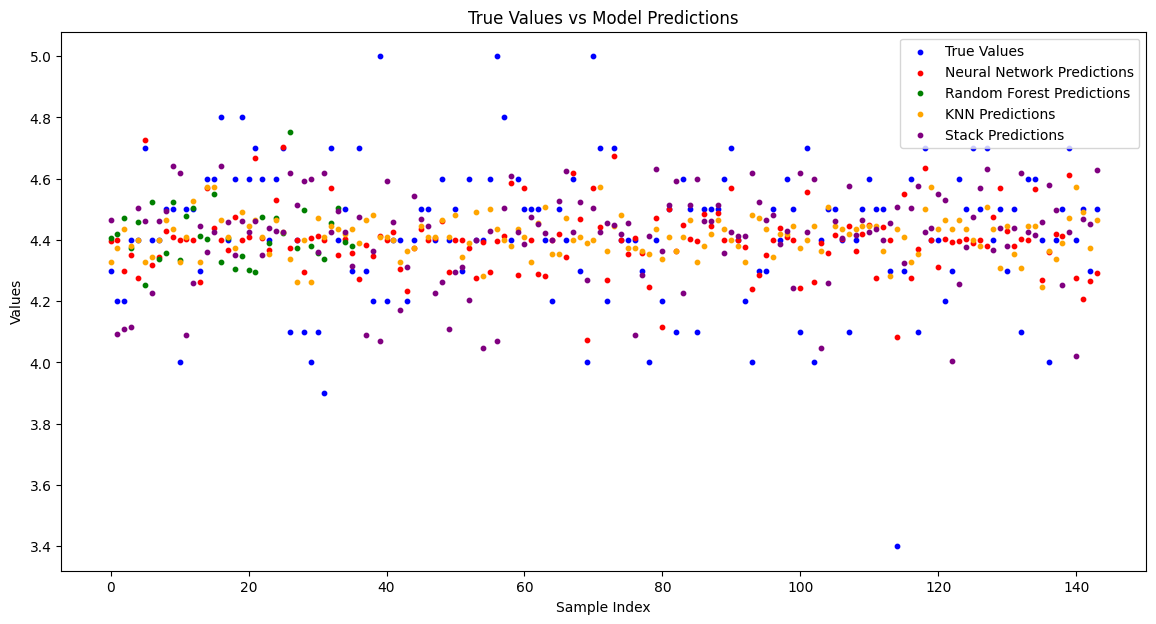

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot true values
plt.scatter(range(len(y_train)), y_train, label='True Values', color='blue', s=10)

# Plot predictions from neural network
plt.scatter(range(len(y_pred_nn)), y_pred_nn, label='Neural Network Predictions', color='red', s=10)

# Plot predictions from random forest
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label='Random Forest Predictions', color='green', s=10)

# Plot predictions from KNN
plt.scatter(range(len(y_pred_knn)), y_pred_knn, label='KNN Predictions', color='orange', s=10)

# Plot predictions from Stack
plt.scatter(range(len(y_pred_stacking)), y_pred_stacking, label='Stack Predictions', color='purple', s=10)

# Adding legend and title
plt.legend()
plt.title('True Values vs Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Values')

# Show plot
plt.show()


In [193]:
# Predict with neural network
y_pred_nn = neural_network.predict(X_val_scaled)
mae_nn = mean_absolute_error(y_val, y_pred_nn)
print(f"Neural Network MAE: {mae_nn}")

# Predict with random forest regressor
y_pred_rf = random_forest_mae.predict(X_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")

y_pred_knn = knn.predict(X_val) 
mae_knn = mean_absolute_error(y_val, y_pred_knn)
print(f"KNN MAE: {mae_knn}")

y_pred_stacking_regressor = stacking_regressor.predict(X_val) 
mae_stacking_regressor = mean_absolute_error(y_val, y_pred_stacking_regressor)
print(f"Stack MAE: {mae_stacking_regressor}")

Neural Network MAE: 0.16354300975799563
Random Forest MAE: 0.14870071684587796
KNN MAE: 0.1714646464646464
Stack MAE: 0.2409009986453586


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


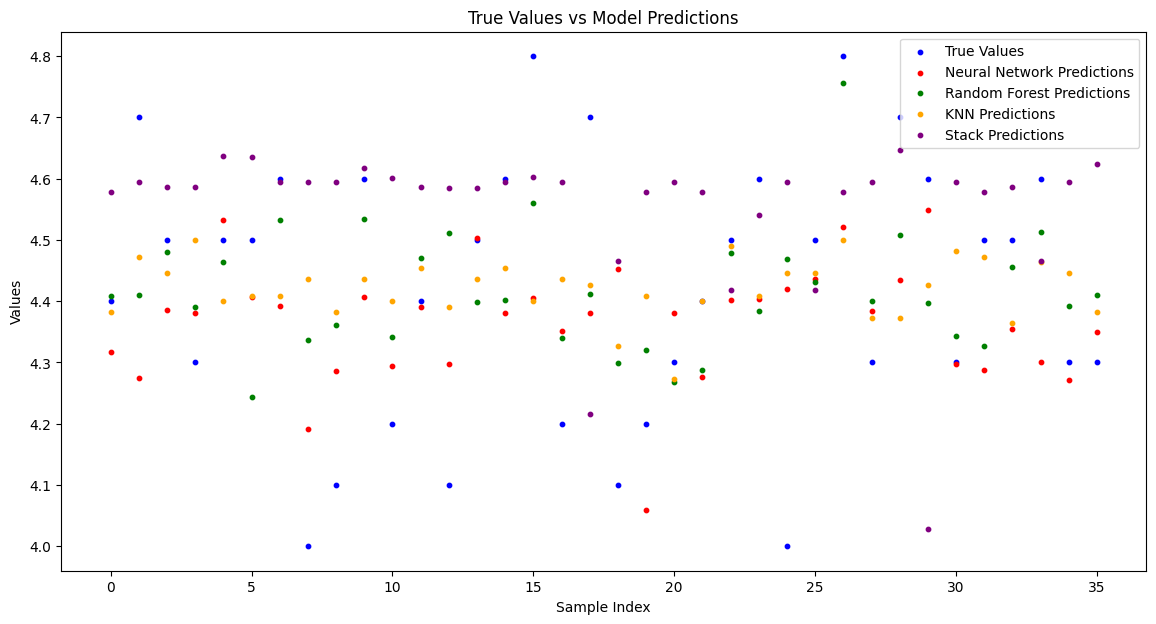

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot true values
plt.scatter(range(len(y_val)), y_val, label='True Values', color='blue', s=10)

# Plot predictions from neural network
plt.scatter(range(len(y_pred_nn)), y_pred_nn, label='Neural Network Predictions', color='red', s=10)

# Plot predictions from random forest
plt.scatter(range(len(y_pred_rf)), y_pred_rf, label='Random Forest Predictions', color='green', s=10)

# Plot predictions from KNN
plt.scatter(range(len(y_pred_knn)), y_pred_knn, label='KNN Predictions', color='orange', s=10)

# Plot predictions from Stack
plt.scatter(range(len(y_pred_stacking_regressor)), y_pred_stacking_regressor, label='Stack Predictions', color='purple', s=10)

# Adding legend and title
plt.legend()
plt.title('True Values vs Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Values')

# Show plot
plt.show()


## IMPORTANCE

In [195]:
importance_df = pd.DataFrame({'Feature': final_features, 'Importance': r2_new_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                     Feature  Importance
1        google_review_count    0.332286
11             city_Boyolali    0.138774
2            travelee_rating    0.098089
0                      price    0.078094
3     jumlah_review_travelee    0.074168
39             city_Semarang    0.027824
34            city_Pelalawan    0.025432
27               city_Malang    0.020287
16              city_Jakarta    0.019260
59  Category2_Taman Nasional    0.017259
44             city_Sukabumi    0.016097
50          Category1_Bahari    0.015533
6               city_Bandung    0.014395
49           city_Yogyakarta    0.012189
52      Category1_Cagar Alam    0.011990
56      Category2_Cagar Alam    0.010937
53     Category1_Desa Wisata    0.009568
30               city_Padang    0.009023
58   Category2_Taman Hiburan    0.008756
25               city_Lombok    0.008118
51          Category1_Budaya    0.006741
57     Category2_Desa Wisata    0.005270
8                city_Bantul    0.004229
10              

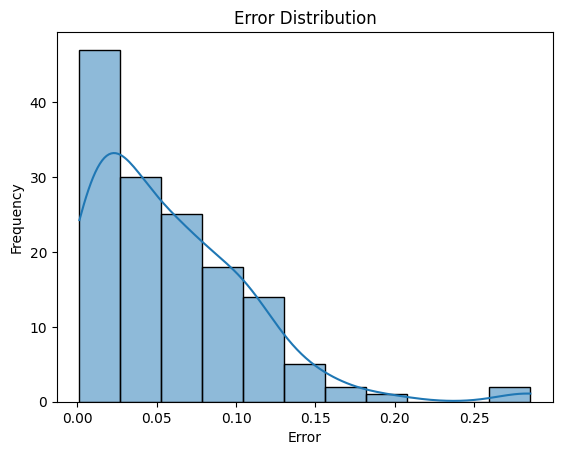

In [196]:
data = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred, 'Error': abs(y_train - y_pred)})

sns.histplot(data['Error'], kde=True)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [197]:
data

,Actual,Predicted,Error
117,4.3,4.314474,0.014474
65,4.2,4.303947,0.103947
67,4.2,4.275000,0.075000
31,4.4,4.411842,0.011842
12,4.4,4.409211,0.009211
...,...,...,...
71,4.7,4.636842,0.063158
106,4.4,4.390789,0.009211
14,4.5,4.527632,0.027632
92,4.3,4.327632,0.027632
